## **1. Objective:**
A phishing website is a common social engineering method that mimics trustful uniform resource locators (URLs) and webpages. The objective of this project is to train machine learning models and deep neural nets on the dataset created to predict phishing websites.

## **2. Loading Data:**

In [ ]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Loading the data
data0 = pd.read_csv('5.urldata.csv')
data0.head()
data0.drop(["Web_Traffic"],axis=1)

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,wvk12-my.sharepoint.com,0,0,1,5,0,0,1,1,0,1,1,0,0,1,0,1
9996,adplife.com,0,0,1,4,0,0,0,0,0,0,1,0,0,1,0,1
9997,kurortnoye.com.ua,0,1,1,3,0,0,1,0,0,1,1,1,0,1,0,1
9998,norcaltc-my.sharepoint.com,0,0,1,5,0,0,1,1,0,1,1,0,0,1,0,1


## **3. Familiarizing with Data**

In [ ]:
#Checking the shape of the dataset
data0.shape

(10000, 18)

In [ ]:
#Listing the features of the dataset
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [ ]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

## **4. Visualizing the data**

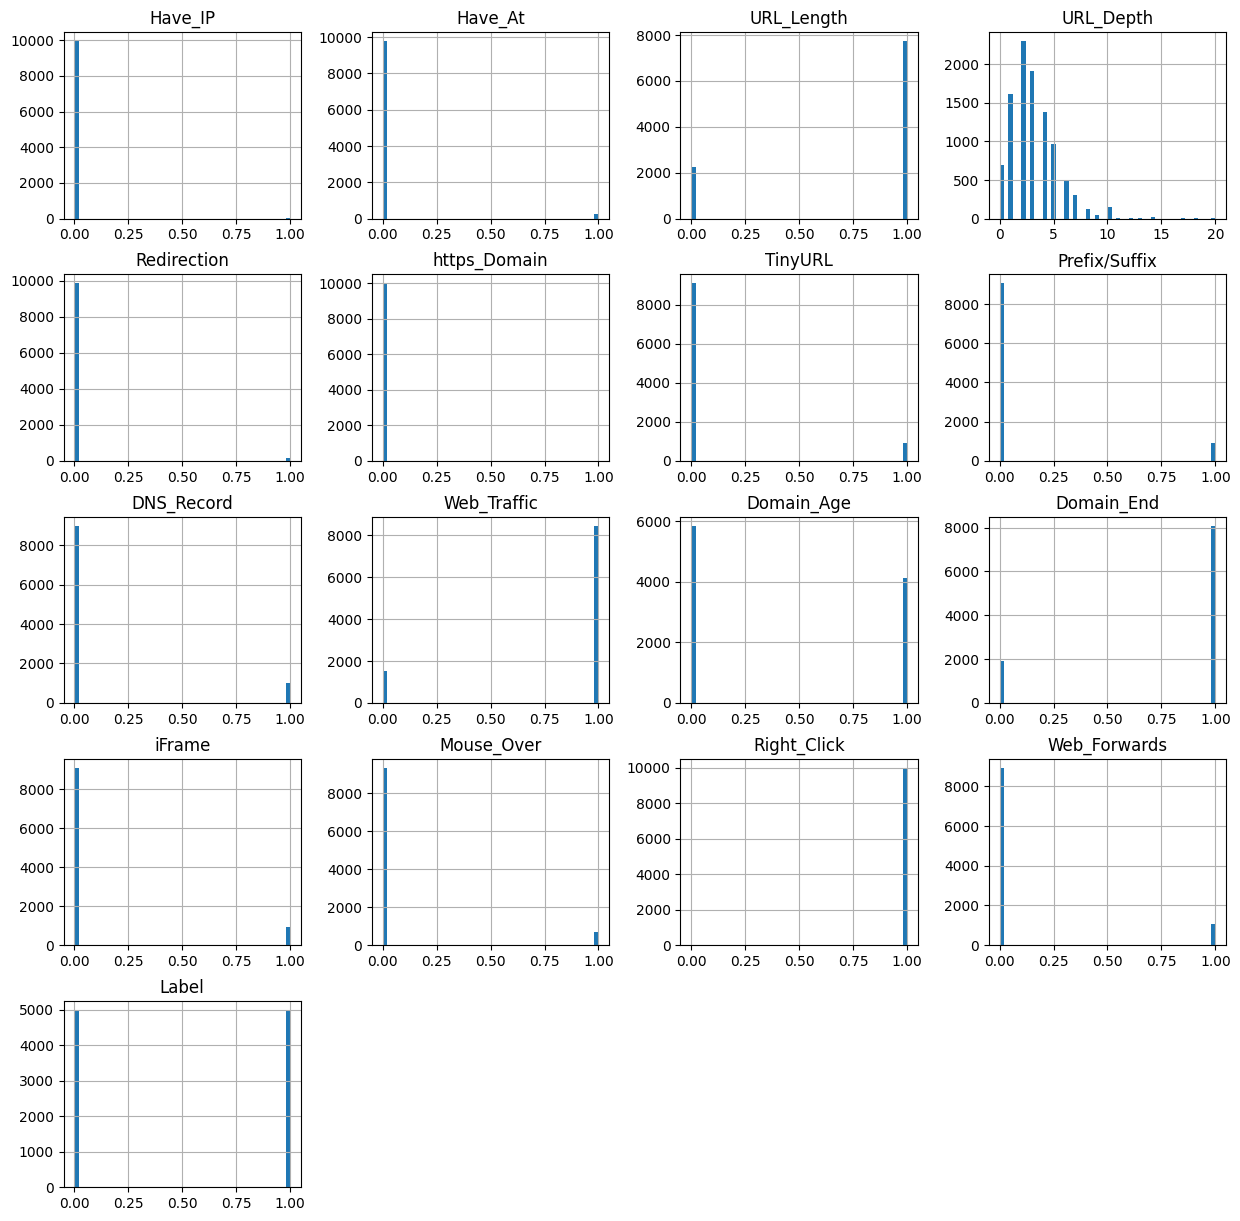

In [ ]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

<ipython-input-7-29e8a59d6953>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data0.corr())


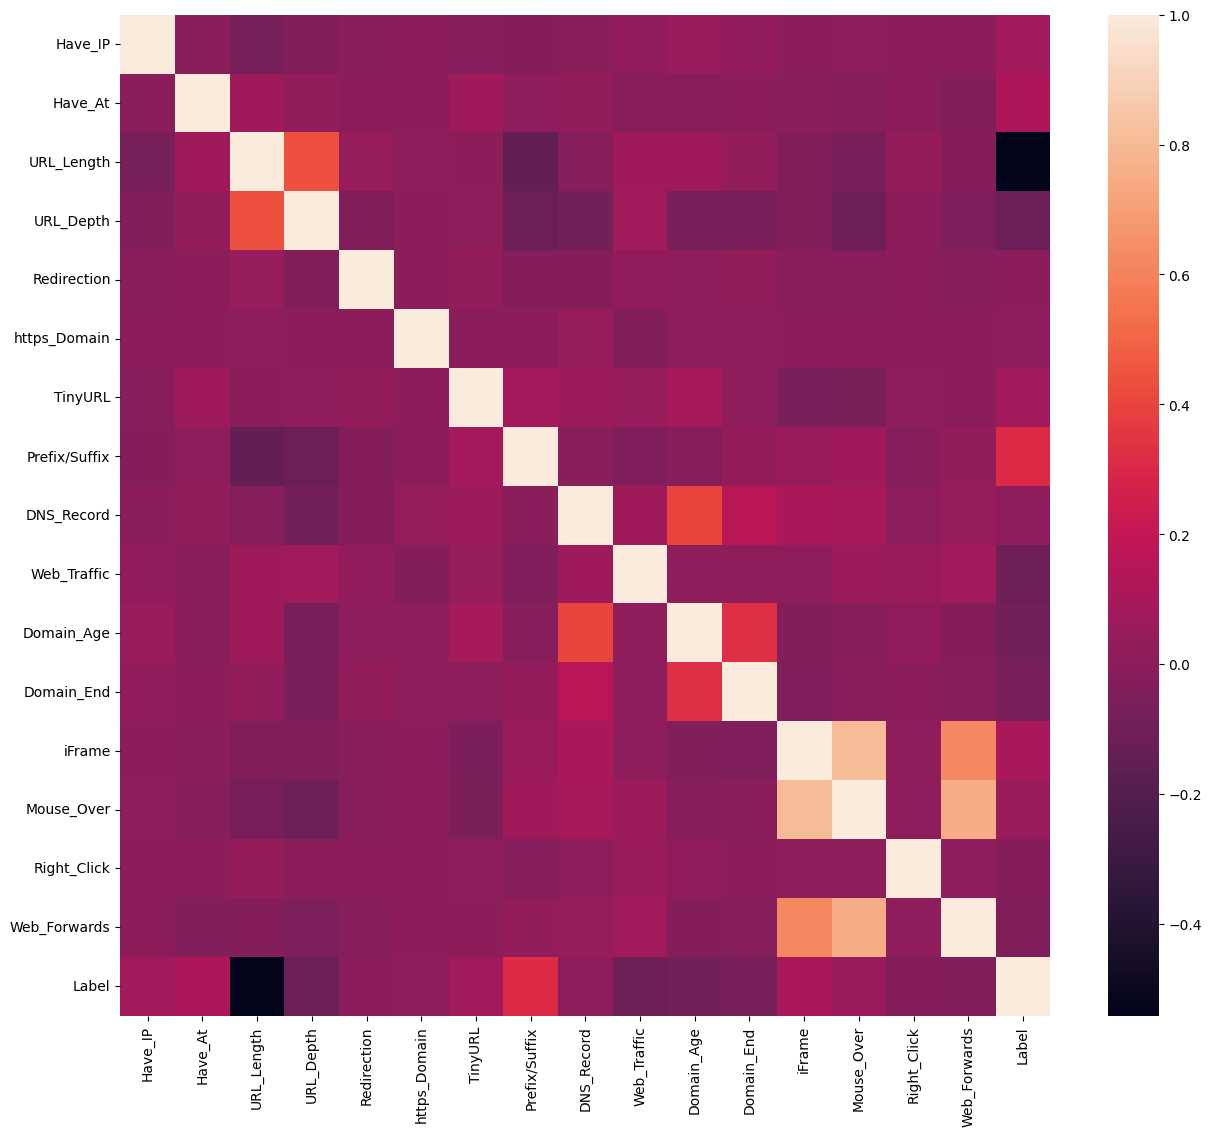

In [ ]:
#Correlation heatmap
plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

## **5. Data Preprocessing**

In [ ]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


In [ ]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy()

In [ ]:
#checking the data for null or missing values
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [ ]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,7,0,0,0,0,1,1,1,1,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,1
2,0,0,0,2,0,0,0,0,0,1,0,1,0,0,1,0,1
3,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,1,1,1,0,0,1,0,1


## **6. Splitting the Data**

In [ ]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop(['Label','Web_Traffic'],axis=1)
X.shape, y.shape

((10000, 15), (10000,))

In [ ]:
X

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards
0,0,0,1,7,0,0,0,0,1,1,1,0,0,1,0
1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0
2,0,0,0,2,0,0,0,0,0,0,1,0,0,1,0
3,0,0,1,3,0,0,0,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,4,0,0,1,0,0,0,1,0,0,1,0
9996,0,0,1,2,0,0,0,0,0,0,0,0,0,1,0
9997,0,0,1,3,0,0,0,0,0,0,1,0,0,1,0
9998,0,0,1,4,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 15), (2000, 15))

## **7. Machine Learning Models & Training**

This data set comes under classification problem, as the input URL is classified as phishing (1) or legitimate (0). The supervised machine learning models (classification) considered to train the dataset in this notebook are:
* Decision Tree
* Random Forest
* Multilayer Perceptrons
* Autoencoder Neural Network

In [ ]:
#importing packages
from sklearn.metrics import accuracy_score

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

### **7.1. Decision Tree Classifier**

In [ ]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

[Text(0.5086206896551724, 0.9166666666666666, 'x[2] <= 0.5\ngini = 0.5\nsamples = 8000\nvalue = [3997, 4003]'),
 Text(0.47413793103448276, 0.75, 'gini = 0.0\nsamples = 1810\nvalue = [0, 1810]'),
 Text(0.5431034482758621, 0.75, 'x[7] <= 0.5\ngini = 0.458\nsamples = 6190\nvalue = [3997, 2193]'),
 Text(0.27586206896551724, 0.5833333333333334, 'x[3] <= 4.5\ngini = 0.427\nsamples = 5754\nvalue = [3977, 1777]'),
 Text(0.13793103448275862, 0.4166666666666667, 'x[1] <= 0.5\ngini = 0.362\nsamples = 4241\nvalue = [3234, 1007]'),
 Text(0.06896551724137931, 0.25, 'x[4] <= 0.5\ngini = 0.346\nsamples = 4138\nvalue = [3216, 922]'),
 Text(0.034482758620689655, 0.08333333333333333, 'gini = 0.34\nsamples = 4057\nvalue = [3176, 881]'),
 Text(0.10344827586206896, 0.08333333333333333, 'gini = 0.5\nsamples = 81\nvalue = [40, 41]'),
 Text(0.20689655172413793, 0.25, 'x[3] <= 2.5\ngini = 0.288\nsamples = 103\nvalue = [18, 85]'),
 Text(0.1724137931034483, 0.08333333333333333, 'gini = 0.428\nsamples = 58\nvalue 

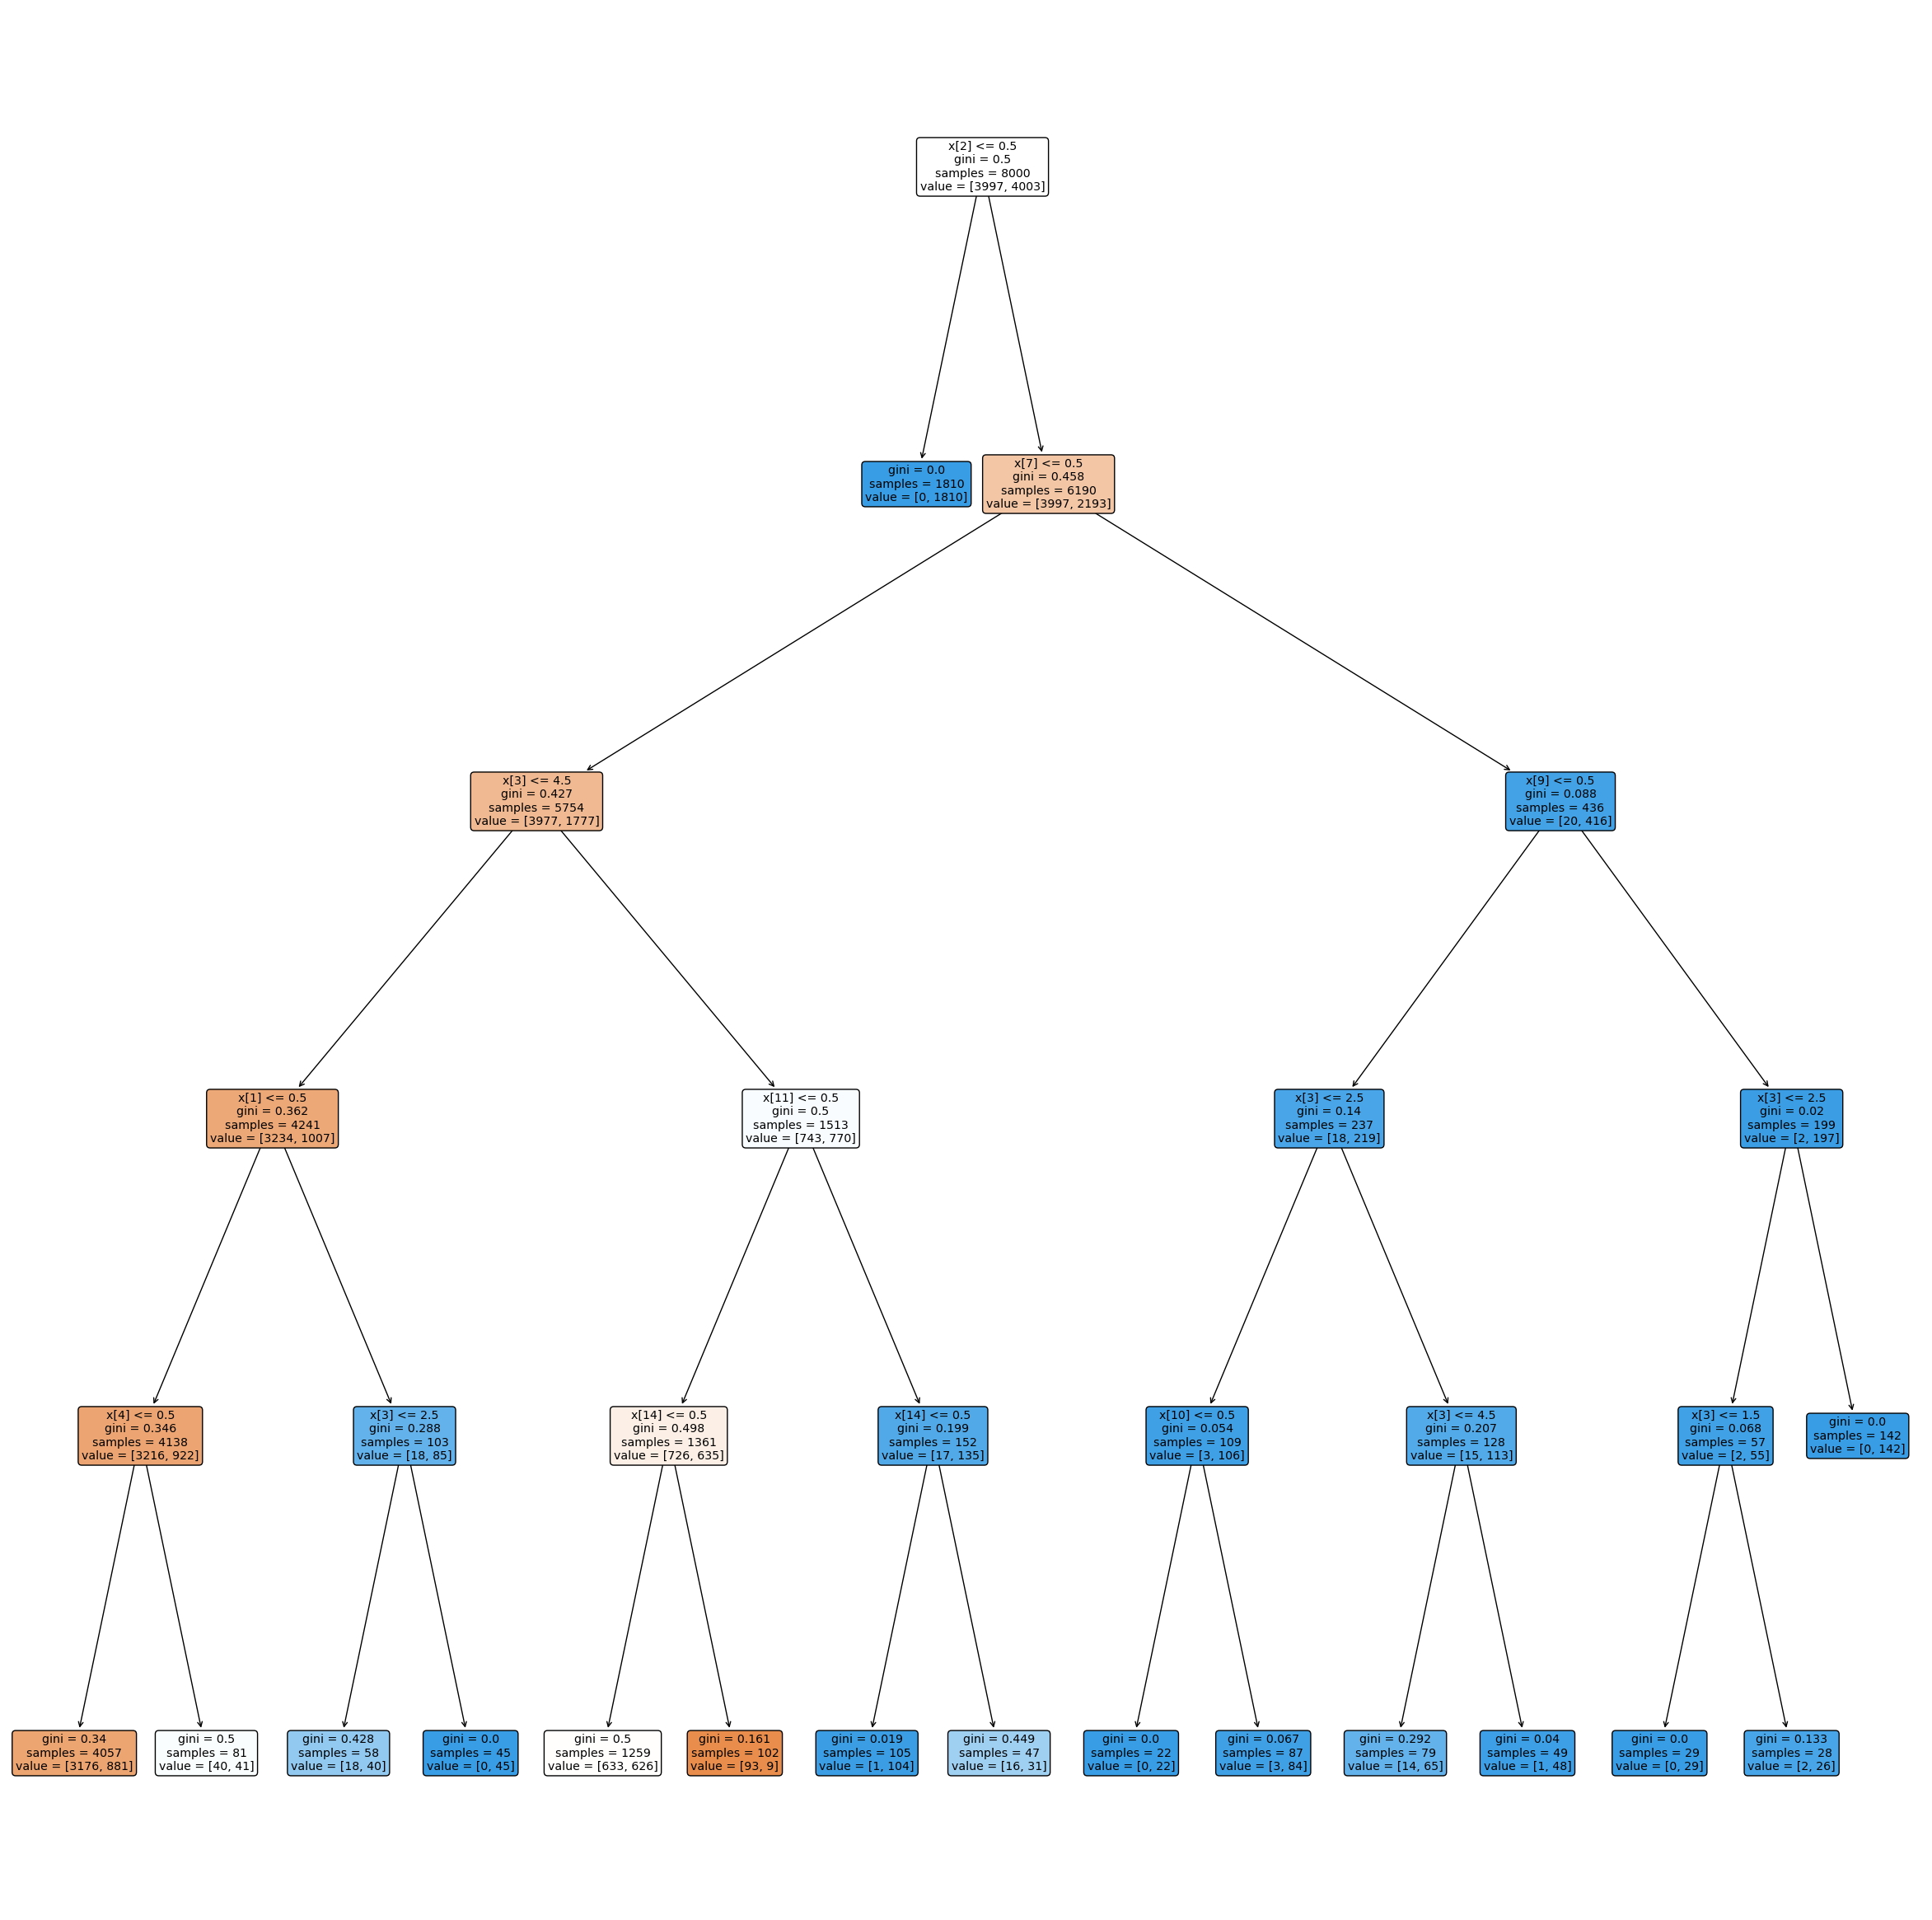

In [ ]:
import sklearn

plt.figure(figsize=(30,30))
sklearn.tree.plot_tree(tree, rounded=True, # Rounded node edges
          filled=True)

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.799
Decision Tree: Accuracy on test Data: 0.797


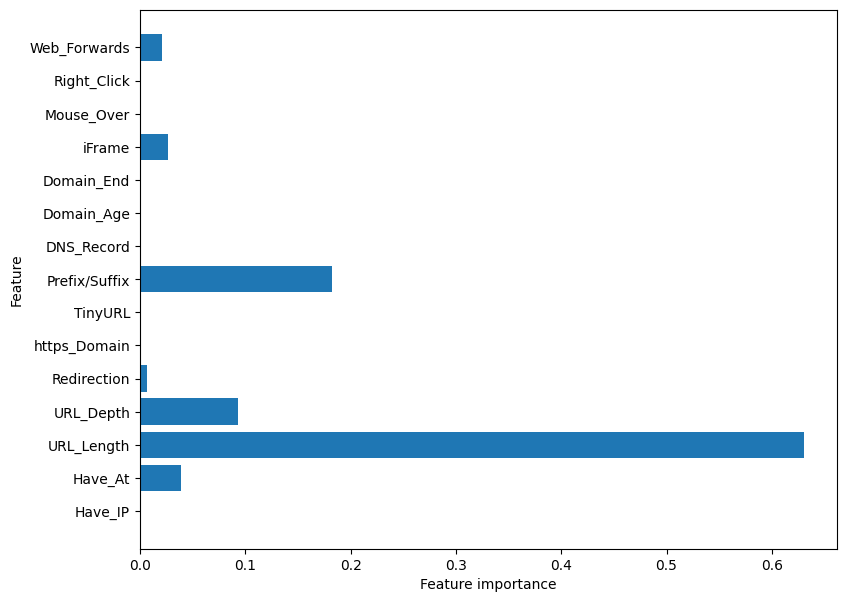

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

### **7.2. Random Forest Classifier**

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.807
Random forest: Accuracy on test Data: 0.812


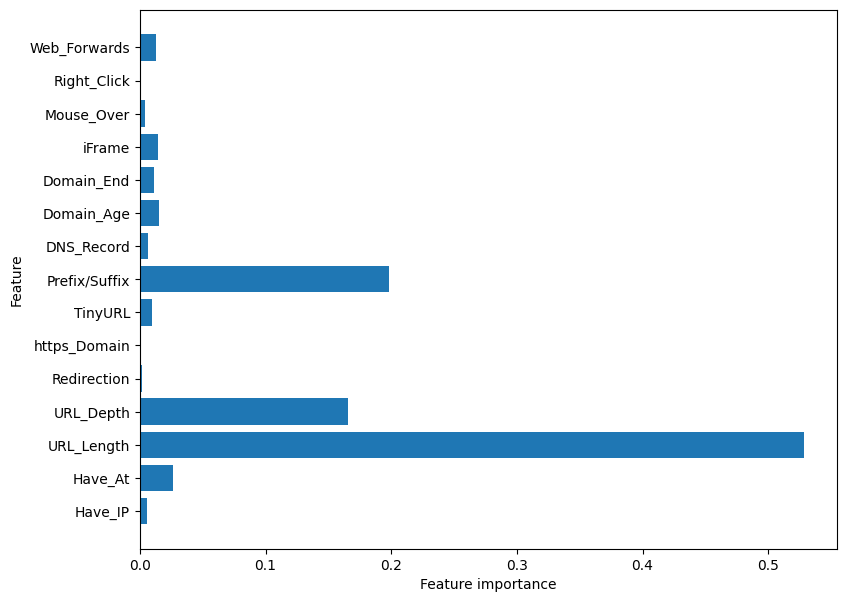

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

### **7.3. Multilayer Perceptrons (MLPs): Deep Learning**

In [3]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))
mlp

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [ ]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [ ]:
mlp.predict([[0, 0, 1, 3, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array([0])

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.844
Multilayer Perceptrons: Accuracy on test Data: 0.851


**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

### **7.4. Autoencoder Neural Network**

In [ ]:
#importing required packages
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

In [ ]:
#building autoencoder model

input_dim = X_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu",
                activity_regularizer=regularizers.l1(10e-4))(input_layer)
encoder = Dense(int(encoding_dim), activation="relu")(encoder)

encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)

decoder = Dense(int(encoding_dim), activation='relu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15)]              0         
                                                                 
 dense (Dense)               (None, 15)                240       
                                                                 
 dense_1 (Dense)             (None, 15)                240       
                                                                 
 dense_2 (Dense)             (None, 13)                208       
                                                                 
 dense_5 (Dense)             (None, 15)                210       
                                                                 
 dense_6 (Dense)             (None, 15)                240       
                                                                 
Total params: 1,138
Trainable params: 1,138
Non-trainable par

In [ ]:
#compiling the model
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

#Training the model
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.2) 

Epoch 1/10
100/100 [==============================] - 2s 5ms/step - loss: 2.6071 - accuracy: 0.3380 - val_loss: 0.9088 - val_accuracy: 0.5412
Epoch 2/10
100/100 [==============================] - 0s 3ms/step - loss: 0.5931 - accuracy: 0.6830 - val_loss: -0.2319 - val_accuracy: 0.8381
Epoch 3/10
100/100 [==============================] - 0s 4ms/step - loss: -1.2081 - accuracy: 0.8455 - val_loss: -1.5443 - val_accuracy: 0.8394
Epoch 4/10
100/100 [==============================] - 0s 4ms/step - loss: -1.6341 - accuracy: 0.8456 - val_loss: -1.6010 - val_accuracy: 0.8394
Epoch 5/10
100/100 [==============================] - 0s 4ms/step - loss: -1.6913 - accuracy: 0.8492 - val_loss: -1.6728 - val_accuracy: 0.8394
Epoch 6/10
100/100 [==============================] - 0s 4ms/step - loss: -1.7478 - accuracy: 0.8541 - val_loss: -1.7144 - val_accuracy: 0.8406
Epoch 7/10
100/100 [==============================] - 0s 4ms/step - loss: -1.7782 - accuracy: 0.8422 - val_loss: -1.7388 - val_accuracy: 0.

**Performance Evaluation:**

In [ ]:
acc_train_auto = autoencoder.evaluate(X_train, X_train)[1]
acc_test_auto = autoencoder.evaluate(X_test, X_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.3f}' .format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}' .format(acc_test_auto))

63/63 [==============================] - 0s 1ms/step - loss: -1.8413 - accuracy: 0.7045

Autoencoder: Accuracy on training Data: 0.691
Autoencoder: Accuracy on test Data: 0.705


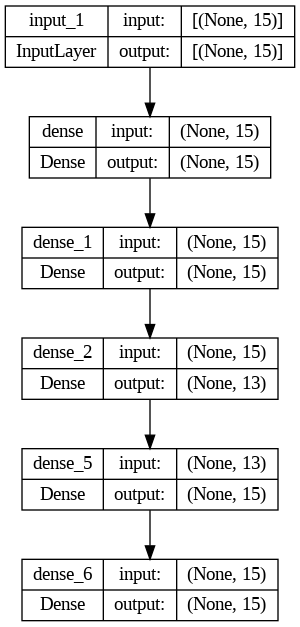

In [ ]:
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
plot_model(autoencoder, to_file='auto_model.png', show_shapes=True, show_layer_names=True)

**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('AutoEncoder', acc_train_auto, acc_test_auto)

### **7.5. Convolution Neural Network**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
vocab_size = 10000
embedding_size = 32
input_length = X.shape[1]

CNN = Sequential()
CNN.add(Embedding(vocab_size, embedding_size, input_length=input_length))
CNN.add(Conv1D(128, 5, activation='relu'))
CNN.add(GlobalMaxPooling1D())
CNN.add(Dense(128, activation='relu'))
CNN.add(Dropout(0.5))
CNN.add(Dense(1, activation='sigmoid'))

CNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 32)            320000    
                                                                 
 conv1d (Conv1D)             (None, 11, 128)           20608     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                        

In [ ]:
# train model
CNN.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
250/250 [==============================] - 3s 9ms/step - loss: 0.5440 - accuracy: 0.7197 - val_loss: 0.4538 - val_accuracy: 0.7775
Epoch 2/10
250/250 [==============================] - 2s 8ms/step - loss: 0.4514 - accuracy: 0.7914 - val_loss: 0.4530 - val_accuracy: 0.7765
Epoch 3/10
250/250 [==============================] - 2s 8ms/step - loss: 0.4300 - accuracy: 0.8066 - val_loss: 0.4074 - val_accuracy: 0.8260
Epoch 4/10
250/250 [==============================] - 4s 16ms/step - loss: 0.4178 - accuracy: 0.8123 - val_loss: 0.3933 - val_accuracy: 0.8240
Epoch 5/10
250/250 [==============================] - 4s 15ms/step - loss: 0.4111 - accuracy: 0.8138 - val_loss: 0.3955 - val_accuracy: 0.8215
Epoch 6/10
250/250 [==============================] - 3s 11ms/step - loss: 0.4053 - accuracy: 0.8179 - val_loss: 0.3805 - val_accuracy: 0.8270
Epoch 7/10
250/250 [==============================] - 2s 8ms/step - loss: 0.3999 - accuracy: 0.8250 - val_loss: 0.3718 - val_accuracy: 0.8295
Epo

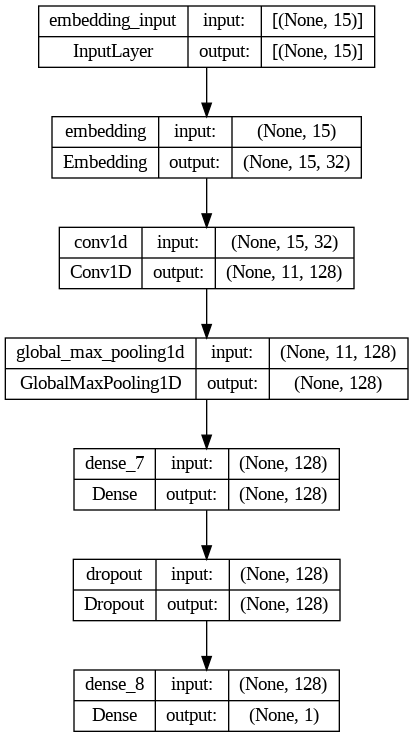

In [ ]:
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
plot_model(CNN, to_file='CNN_model.png', show_shapes=True, show_layer_names=True)

**Performance Evaluation:**

In [ ]:
# evaluate model
acc_train_cnn = CNN.evaluate(X_train,y_train)[1]
acc_test_cnn = CNN.evaluate(X_test, y_test)[1]
print("Convolution Neural Network: Accuracy on training Data: {:.3f}".format(acc_train_cnn))
print("Convolution Neural Network: Accuracy on test Data: {:.3f}".format(acc_test_cnn))

63/63 [==============================] - 0s 2ms/step - loss: 0.3907 - accuracy: 0.8270
Convolution Neural Network: Accuracy on training Data: 0.828
Convolution Neural Network: Accuracy on test Data: 0.827


**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('CNN', acc_train_cnn, acc_test_cnn)

## **8. Comparision of Models**

In [ ]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.799,0.798
1,Random Forest,0.807,0.812
2,Multilayer Perceptrons,0.844,0.850
3,AutoEncoder,0.691,0.705
4,CNN,0.828,0.827


In [ ]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
2,Multilayer Perceptrons,0.844,0.850
4,CNN,0.828,0.827
1,Random Forest,0.807,0.812
0,Decision Tree,0.799,0.798
3,AutoEncoder,0.691,0.705


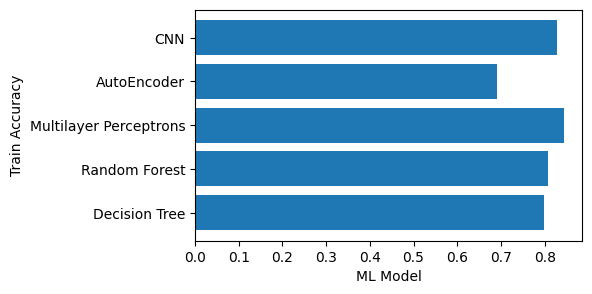

In [ ]:
#plotting the accuracies
plt.figure(figsize=(5,3))
plt.barh(results['ML Model'],results['Train Accuracy'], align='center')
plt.xlabel("ML Model")
plt.ylabel("Train Accuracy")
plt.show()

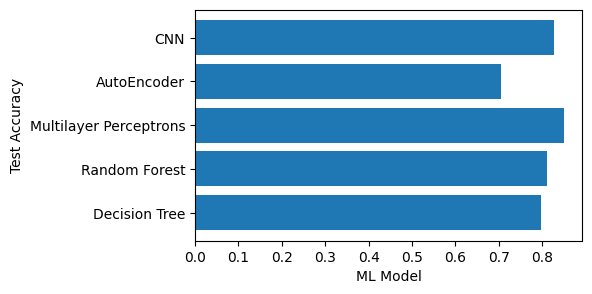

In [ ]:
#plotting the accuracies
plt.figure(figsize=(5,3))
plt.barh(results['ML Model'],results['Test Accuracy'], align='center')
plt.xlabel("ML Model")
plt.ylabel("Test Accuracy")
plt.show()

## **9. Generation of Pickle file**

In [ ]:
import pickle
pickle.dump(mlp, open('mlp.pkl', 'wb'))